In [1]:
import pandas
import numpy as np
from sklearn.datasets import load_boston
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
data = load_boston()

In [3]:
X = scale(data.data)
Y = data.target

In [4]:
def fit(k, X, Y):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    kNN = KNeighborsRegressor(weights='distance', p=k)
    mark = []
    for train_index, test_index in kf.split(X):
        X_train = [X[i] for i in train_index]
        Y_train = [Y[i] for i in train_index]
        X_test = [X[i] for i in test_index]
        Y_test = [Y[i] for i in test_index]
        kNN.fit(X_train, Y_train)
        mark.append(np.mean(cross_val_score(kNN, X_train, Y_train, cv=kf, scoring='neg_mean_squared_error')))
    return np.mean(mark)

In [5]:
marks = []
for i in tqdm(np.linspace(1,10,200)):
    marks.append(fit(i, X, Y))

100%|██████████| 200/200 [01:50<00:00,  1.87it/s]


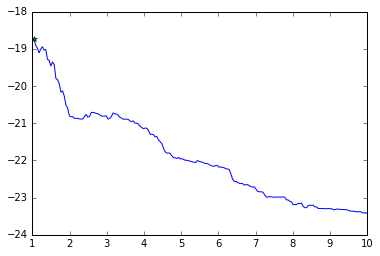

In [6]:
x = np.linspace(1,10,200)
y = marks
y_max = max(marks)
x_max = x[marks.index(y_max)]
plt.plot(x,y)
plt.plot(x_max, y_max, '*')
plt.show()

In [7]:
print y_max
print x_max

-18.7277980665
1.04522613065


In [8]:
np.around(x_max,decimals=1)

1.0

In [ ]:
np.argmax(marks)

In [ ]:
x[29]